**TODO**
- Sentiment analysis column
- Try out some models 

If all do bad go to next step and try word2vec:
- Word2Vec possibly on text column

# Modeling pt 1
This notebook runs throught the predictive modeling for the binary classicatiosn for buy or sell.
It runs through a few diffrent models, along with 3 types of data for the models. The best model ends up being SVM with 
.53 % accuracy

In [1]:
def prep_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=.9, stratify=y)
    normalizer = preprocessing.Normalizer()
    norm_train_X = normalizer.fit_transform(X_train)
    norm_test_X = normalizer.fit_transform(X_test)
    return norm_train_X, norm_test_X, y_train, y_test

Above is a function for helping split our data. 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

data_path = os.path.join('nice_combined_data.csv')
df = pd.read_csv(data_path)
df['target'] = df['target'].apply(lambda x : 1 if x > 0 else 0)
df['Date'] = pd.to_datetime(df['Date'])
print(df.shape)
df.head()

Load in the cleaned data

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

try:
    df = pd.read_pickle('sent_df')
except:
    analyzer = SentimentIntensityAnalyzer() 
    df['polarity'] = df['text'].apply(lambda x : analyzer.polarity_scores(x))
    df['neg'] = [x['neg'] for x in df['polarity']]
    df['neu'] = [x['neu'] for x in df['polarity']]
    df['pos'] = [x['pos'] for x in df['polarity']]
    df = df.drop(columns=['polarity'])
    df.head()
    df.to_pickle('sent_df')


Get the Sentiment Analyzer values for all of the text

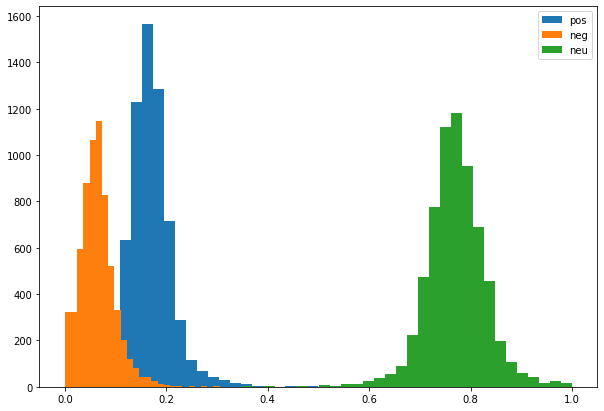

In [7]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.hist(df['pos'], bins=30, label='pos')
plt.hist(df['neg'], bins=30, label='neg')
plt.hist(df['neu'], bins=30, label='neu')
plt.title('Sentiments')
plt.legend()
plt.show()

This is a distrobution plot of all the sentmiment for the text per each type

In the below cells, we explore the distrobutions for the Sentiment to the target to see if any would be predictive

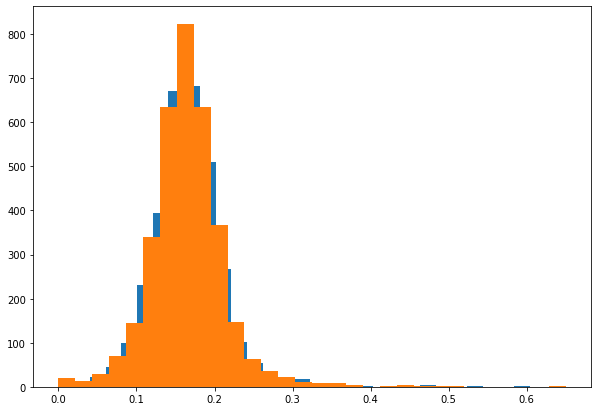

In [8]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.hist(df['pos'][df['target'] == 1], bins=30)
plt.hist(df['pos'][df['target'] == 0], bins=30)
plt.title('Positive Distros')
plt.show()

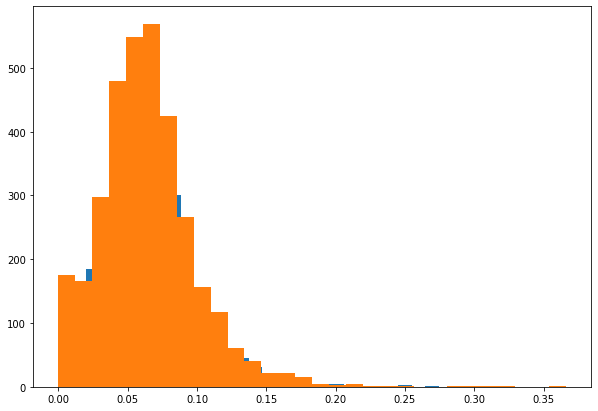

In [9]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.hist(df['neg'][df['target'] == 1], bins=30)
plt.hist(df['neg'][df['target'] == 0], bins=30)
plt.title('Positive Distros')
plt.show()

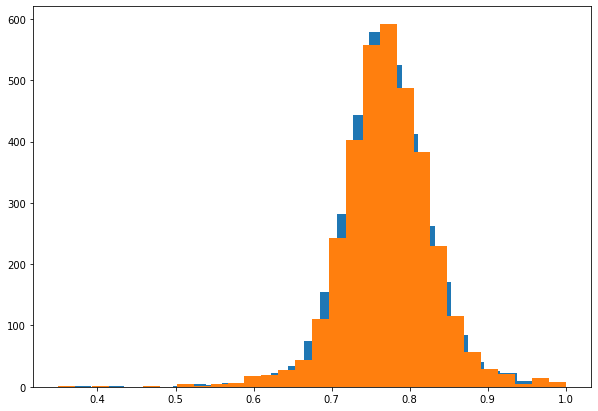

In [10]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.hist(df['neu'][df['target'] == 1], bins=30)
plt.hist(df['neu'][df['target'] == 0], bins=30)
plt.title('Positive Distros')
plt.show()

#### Okay so it looks like there is nothing realling telling about the sentament no its own. Lets try to augment it by how much people agree with this by using the metrics we have on the post

In [11]:
augmented_df = df.copy()

In [12]:
augmented_df['neg'] = augmented_df['upvote_ratio'] * augmented_df['neg']
augmented_df['pos'] = augmented_df['upvote_ratio'] * augmented_df['pos']
augmented_df['neu'] = augmented_df['upvote_ratio'] * augmented_df['neu']

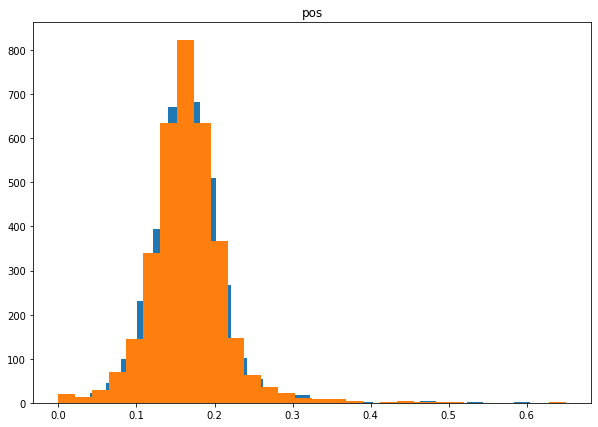

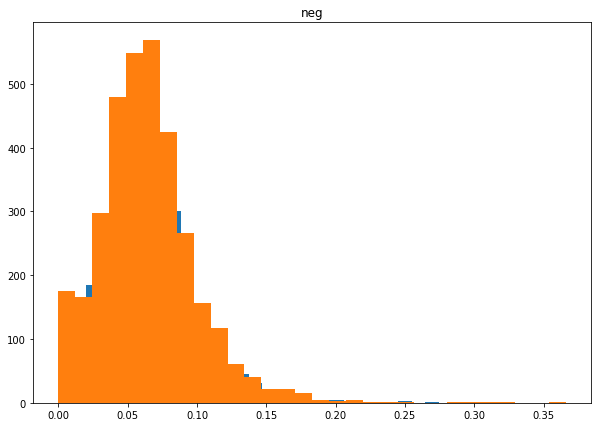

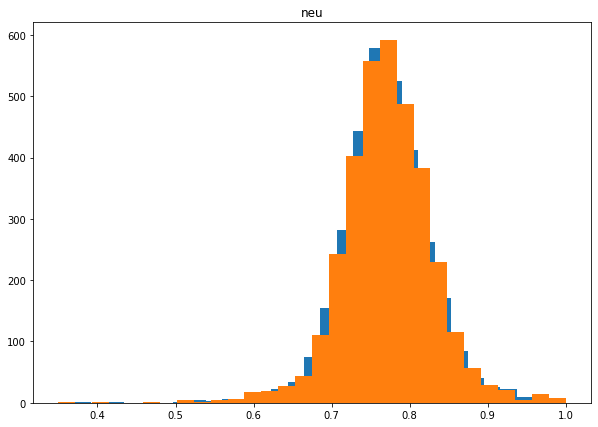

In [13]:
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()
# not good yet

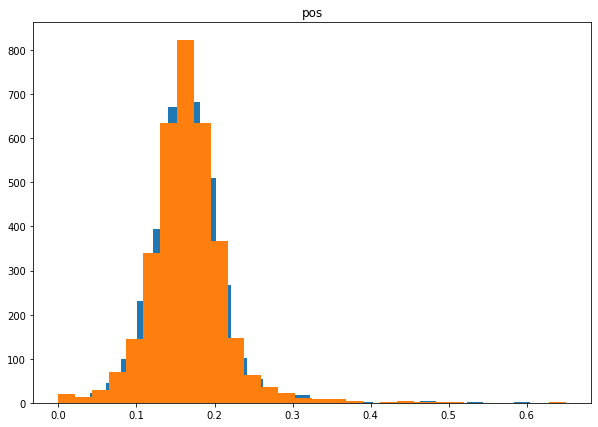

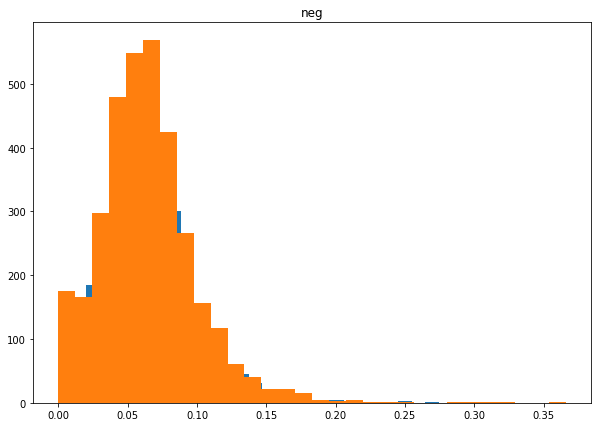

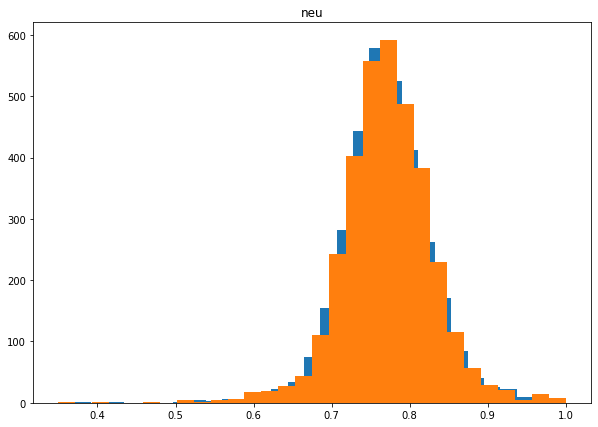

In [14]:
augmented_df['neg'] = augmented_df['score'] * augmented_df['neg']
augmented_df['pos'] = augmented_df['score'] * augmented_df['pos']
augmented_df['neu'] = augmented_df['score'] * augmented_df['neu']
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()
# darn

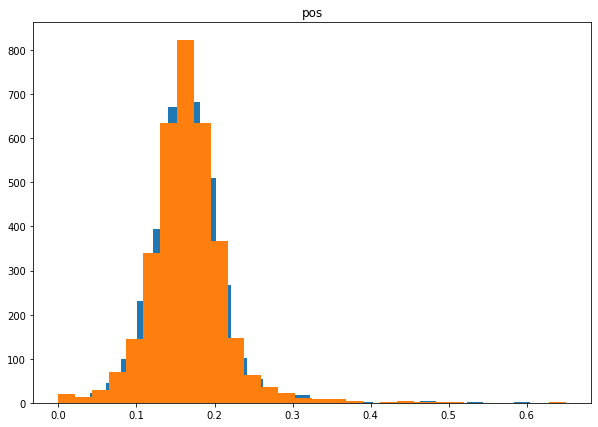

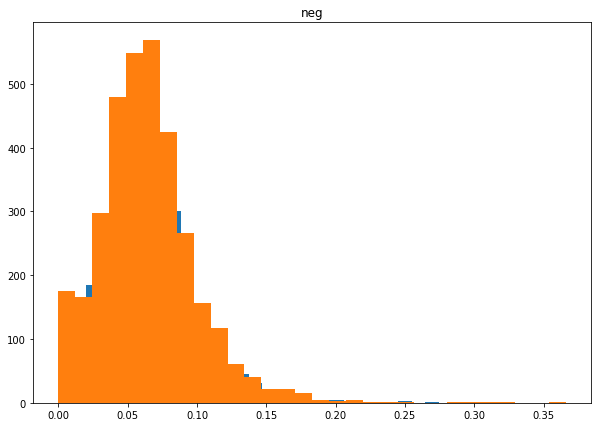

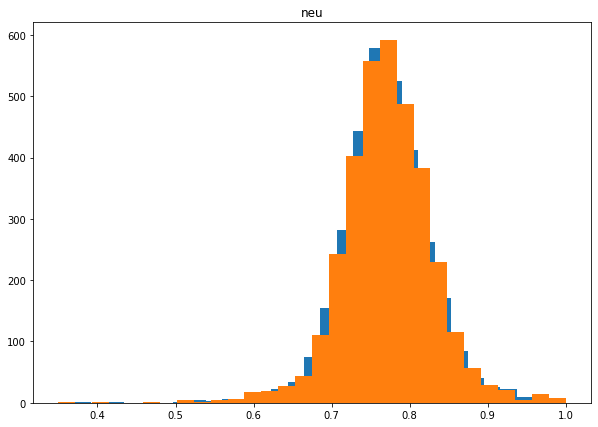

In [15]:
augmented_df['neg'] = augmented_df['total_awards_received'] * augmented_df['neg']
augmented_df['pos'] = augmented_df['total_awards_received'] * augmented_df['pos']
augmented_df['neu'] = augmented_df['total_awards_received'] * augmented_df['neu']
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()
# hmmm...

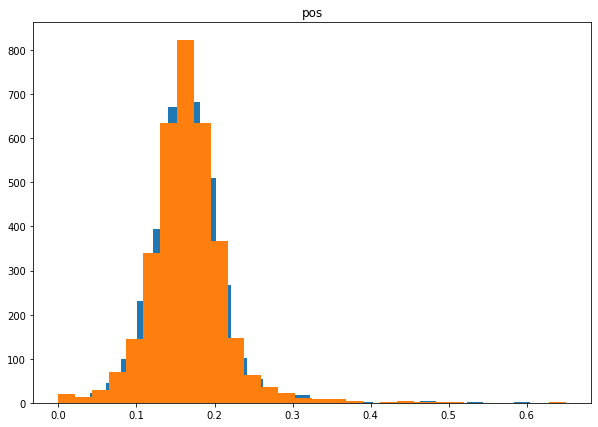

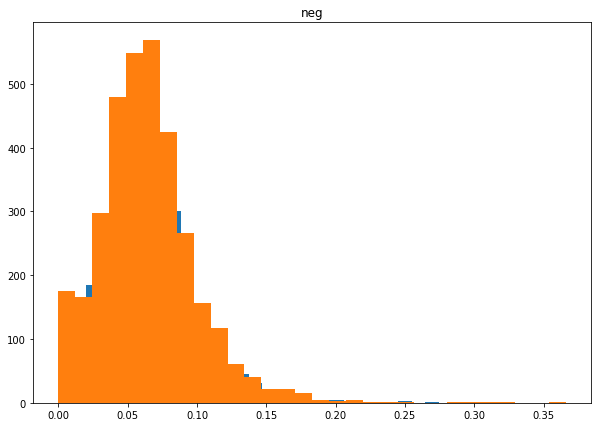

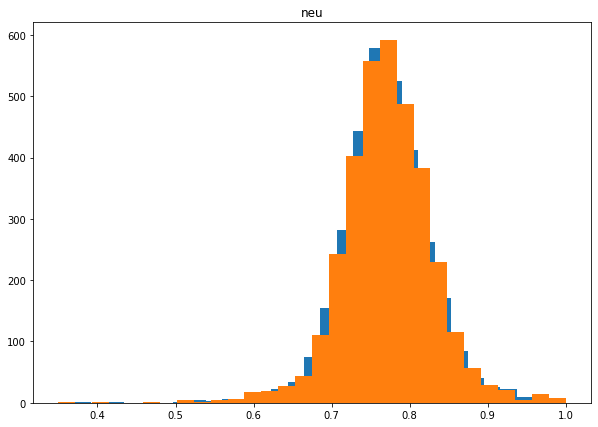

In [16]:
augmented_df['neg'] = augmented_df['num_comments'] * augmented_df['neg']
augmented_df['pos'] = augmented_df['num_comments'] * augmented_df['pos']
augmented_df['neu'] = augmented_df['num_comments'] * augmented_df['neu']
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()
# yikes

In [17]:
try_two = df.copy()

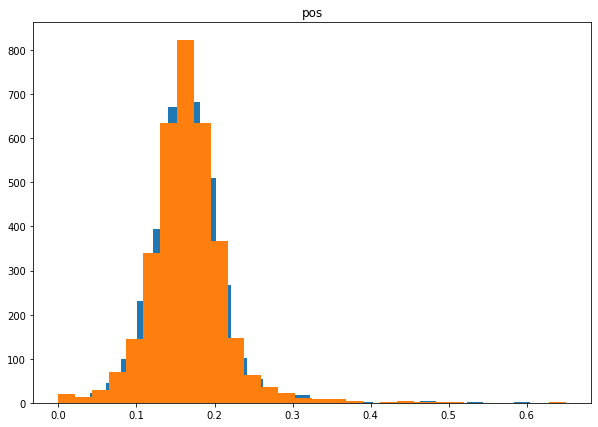

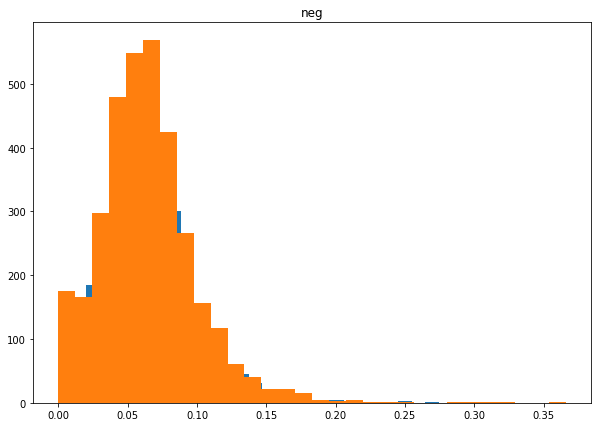

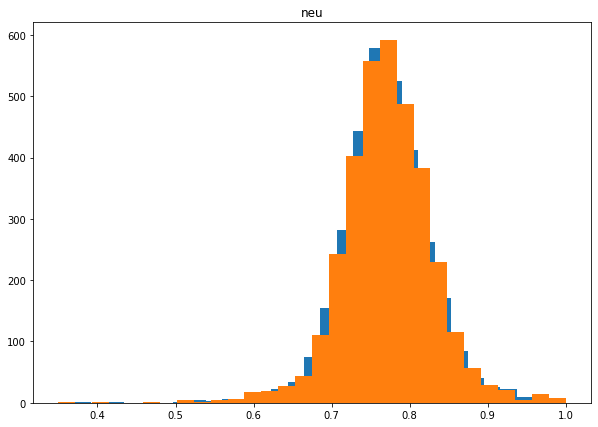

In [18]:
try_two['neg'] = try_two['num_comments'] * try_two['neg']
try_two['pos'] = try_two['num_comments'] * try_two['pos']
try_two['neu'] = try_two['num_comments'] * try_two['neu']
for c in ['pos', 'neg', 'neu']:
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.hist(df[c][df['target'] == 1], bins=30)
    plt.hist(df[c][df['target'] == 0], bins=30)
    plt.title(c)
    plt.show()

All of the above plots show no improvement

Lets try to use predictive models on teh meta data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# lets throw some random stuff at it and see what happens
# no text included, all unique values so no need, and metioned for now
X = df[['mentioned_count','upvote_ratio','score','gilded','total_awards_received','num_comments', 'neg','neu','pos']].to_numpy()
y = df['target'].to_numpy()

In [21]:
X_train, X_test, y_train, y_test = prep_data(X, y)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error, accuracy_score

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'RF: {acc}')
# RF: 0.5106382978723404


RF: 0.4908814589665654


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'LR: {acc}')
# LR: 0.513677811550152


LR: 0.5030395136778115


In [24]:
from sklearn.svm import SVC

svc = SVC(random_state=1)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'SVM: {acc}')
# SVM: 0.5197568389057751


SVM: 0.4969604863221885


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'KNN: {acc}')
# KNN: 0.4817629179331307


KNN: 0.45288753799392095


In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'GNB: {acc}')
# GNB: 0.4817629179331307


GNB: 0.4787234042553192


In [27]:
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.optimizers import Adam, SGD, RMSprop
import keras

# I know this is way too big, tried lots of network archs, with and without dropout, diffrent optimizers, learning rates, callbacks, all no good
model = Sequential(
    [
        Dense(9, activation='relu'),
        Dense(2048, activation='relu'),
        Dropout(.3),
        Dense(1024, activation='relu'),
        Dropout(.3),
        Dense(512, activation='relu'),
        Dropout(.3),
        Dense(256, activation='relu'),
        Dropout(.3),
        Dense(128, activation='relu'),
        Dropout(.3),
        Dense(64, activation='relu'),
        Dropout(.3),
        Dense(32, activation='relu'),
        Dropout(.3),
        Dense(16, activation='relu'),
        Dropout(.3),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(2, activation='relu'),
        Dense(1, activation = 'softmax'),
    ]
)

optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

call=[
    keras.callbacks.EarlyStopping(monitor='accuracy',patience=10),
    keras.callbacks.ModelCheckpoint(
    filepath='pred_model.h5',
    monitor='val_loss',
    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
   ]

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=64,epochs=100, callbacks=call)

Epoch 1/100


2023-02-19 19:28:37.739776: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


93/93 [==============================] - 3s 24ms/step - loss: 0.6931 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 2/100
93/93 [==============================] - 2s 22ms/step - loss: 0.6931 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 3/100
93/93 [==============================] - 2s 23ms/step - loss: 0.6931 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 4/100
93/93 [==============================] - 2s 22ms/step - loss: 0.6931 - accuracy: 0.4858 - val_loss: 0.6930 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 5/100
93/93 [==============================] - 2s 22ms/step - loss: 0.6930 - accuracy: 0.4858 - val_loss: 0.6930 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 6/100
93/93 [==============================] - 3s 27ms/step - loss: 0.6930 - accuracy: 0.4858 - val_loss: 0.6930 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 7/100
93/93 [==============================] - 2s 27

In [28]:
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'NN: {acc}')
# NN: 0.47720364741641336


21/21 [==============================] - 0s 4ms/step
NN: 0.48632218844984804


None of the above tests helped much, so lets explor how we can use the text data, starting with a dim-reduced version of the data. In the below cells, we use a BOW approch to represnt the text, and then use SVD to reduce the data down to 10 features

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [37]:
vectorizer = CountVectorizer()
# df_by_date = df.groupby(['Date', 'mentioned'])['text'].apply(lambda x: ' '.join(x)).reset_index()
# ret_by_date = vectorizer.fit_transform(df_by_date['text'])
ret = vectorizer.fit_transform(df['text'])

In [39]:
df_hd = pd.DataFrame(ret.toarray(),columns=vectorizer.get_feature_names_out())
df_hd.head()
# checking to make sure it turned out how we planned

,00,000,0000,00000,000000,00000000,000000000,000000000000000000001,000000000042069,0000000001,000000001,00000001,00000001002hkdhkd,00000001sthen,000000020041,000000040052,000000050000002,00000005011krwkrw,0000001,000000110595,0000001tldr,0000002,0000002600000014,0000002900000015,000000400000022,0000005901233,0000006735,000000s,000001,0000010,0000010000,0000011,0000012,00000123,0000012312017,0000012312018,0000012312019,0000012500000069,00000127,0000013,0000014,0000015,0000016,0000017,0000018,0000019,000001s,000002,0000020,0000021,0000022,00000227short,0000023,0000024,0000025,00000253,0000026,0000027,0000028,0000029,000002patrick,000003,0000030,0000031,0000032,0000033,0000034,0000035,0000036,0000037,0000038,0000039,000004,0000040,0000040050062,0000041,00000418391235,0000042,0000043,0000044,0000045,0000046,00000467short,0000047,0000048,0000049,000005,0000050,0000050000entertainment6,0000050000food,0000050000healthcare6,000005000when,000005104,0000058333grand,0000059,000006,00000689,0000069,000007,000007wsb,000008,000009,00000balance,00000car,00000cash,00000deposit,00000difference,00000dq191,00000eureur,00000february,00000fi,00000food,00000fslrfirst,00000grand,00000health,00000hkd721,00000ipoddebit,00000noknok,00000nzd4,00000retirement,00000sep201416,00000snprcovered,00000usd,00000we,00000wonder,...,zoster,zotac,zotye,zpod,zprv,zprx,zrich,zsan,zsan_ah,zsanheres,zsans,zscaler,zscaler925284573,zscalercrowdstrike,zscestrian,zscore,zshare,zt,ztable,zte,ztein,zti,ztipst,ztipstvanguard,ztis,ztna,zto,zts,ztszoetis,ztz99,zu,zuboff,zucchini,zuccotti,zuck,zucked,zuckenberg,zuckerberg,zuckerbergcecilia,zuckerbergs,zuckerbot,zuckerburg,zuckerverse,zucks,zuclomiphene,zudem,zuffa,zufllige,zug,zuiderdam,zuk,zukaufen,zuletzt,zulily,zulilychief,zulilys,zulilyso,zulilyvp,zullen,zulresso,zult,zulu,zum,zuma,zuma19,zumba,zumiez,zumz,zunami,zune,zunxiang,zunxiangexclusive,zuo,zuoquan,zuoquanfebruary,zuora,zuoras,zuoratodays,zur,zuranolone,zurich,zurichbased,zurichdigital,zusammenwe,zusatzkosten,zustndige,zuvor,zuwie,zvi,zvia,zvo,zvv,zwang,zwar,zwc,zwei,zweig,zweigchoose,zweigdimenna,zweigif,zweigmany,zwitsal,zx200bi,zx4,zx5,zy,zydus,zyesami,zyesamivip,zyesamivipaviptadil,zylo,zymergen,zyne,zyng,zynga,zyngathanks,zynteglo,zyx,zz,zzz,zzzmy,zzzwhats,zzzzzs,zzzzzzzzzzzassumes,zzzzzzzzzzzzzzzzzzgo
0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [40]:
trunk = TruncatedSVD(n_components=10)
reduc = trunk.fit_transform(ret)

Reduce to 10 compenets

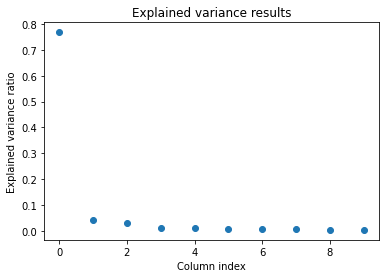

In [41]:
plt.scatter(list(range(10)), trunk.explained_variance_ratio_)
plt.title('Explained variance results')
plt.xlabel('Column index')
plt.ylabel('Explained variance ratio')
plt.show()
# here are the explained variances of the components, we see that the first is by far the best for represting the data, but we will use them all

Below, we plot pairs of componets with decreasing variance explanation to see if any of them seprate out the features

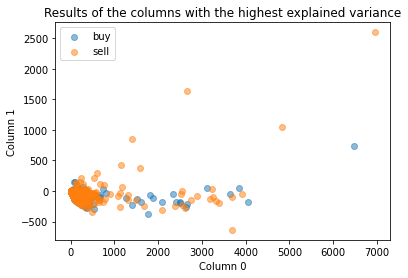

In [42]:
plt.scatter(reduc[:, 0][df['target'] == 1], reduc[:, 1][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 0][df['target'] == 0], reduc[:, 1][df['target'] == 0], alpha = .5)
plt.title('Results of the columns with the highest explained variance')
plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.legend(['buy', 'sell'])
plt.show()

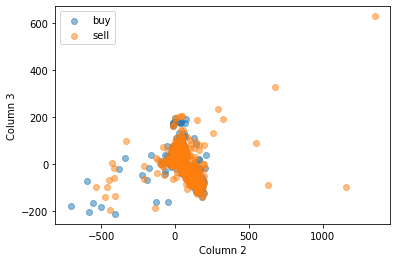

In [43]:
plt.scatter(reduc[:, 2][df['target'] == 1], reduc[:, 3][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 2][df['target'] == 0], reduc[:, 3][df['target'] == 0], alpha = .5)
plt.xlabel('Column 2')
plt.ylabel('Column 3')
plt.legend(['buy', 'sell'])
plt.show()
# I see potentain in this one, there is a huge shared area, but the right side has only sells

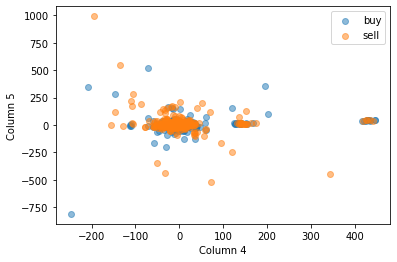

In [44]:
plt.scatter(reduc[:, 4][df['target'] == 1], reduc[:, 5][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 4][df['target'] == 0], reduc[:, 5][df['target'] == 0], alpha = .5)
plt.xlabel('Column 4')
plt.ylabel('Column 5')
plt.legend(['buy', 'sell'])
plt.show()

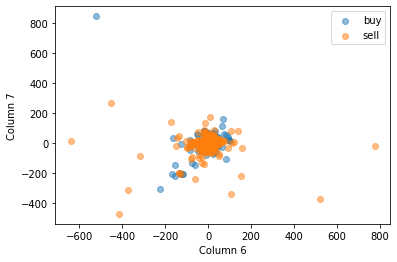

In [45]:
plt.scatter(reduc[:, 6][df['target'] == 1], reduc[:, 7][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 6][df['target'] == 0], reduc[:, 7][df['target'] == 0], alpha = .5)
plt.xlabel('Column 6')
plt.ylabel('Column 7')
plt.legend(['buy', 'sell'])
plt.show()

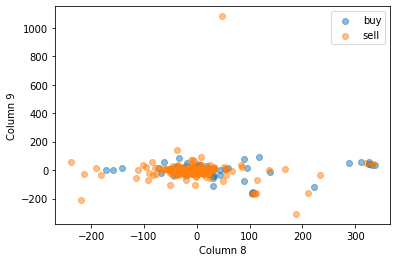

In [46]:
plt.scatter(reduc[:, 8][df['target'] == 1], reduc[:, 9][df['target'] == 1], alpha = .5)
plt.scatter(reduc[:, 8][df['target'] == 0], reduc[:, 9][df['target'] == 0], alpha = .5)
plt.xlabel('Column 8')
plt.ylabel('Column 9')
plt.legend(['buy', 'sell'])
plt.show()

We see that there is no real sepration from the SVD compenets, but lets try to learn from tjem anyway

In [48]:
# now, lets re run the models from above with this input

These models wre chosen becasue tehy are all made for classification and we wanted to test a broad array of models

In [49]:
X_train, X_test, y_train, y_test = prep_data(reduc, y)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'RF: {acc}')

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'LR: {acc}')

svc = SVC(random_state=1)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'SVM: {acc}')

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'KNN: {acc}')

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'GNB: {acc}')
# RF: 0.5167173252279635
# LR: 0.506079027355623
# SVM: 0.4817629179331307
# KNN: 0.48632218844984804
# GNB: 0.513677811550152

RF: 0.5273556231003039
LR: 0.5106382978723404
SVM: 0.5243161094224924
KNN: 0.5227963525835866
GNB: 0.48024316109422494


This network went through many itterations, as did all of the ones in this notebook, and this was found to be the best of what was tried

In [50]:
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.optimizers import Adam, SGD, RMSprop
import keras

# I know this is way too big, tried lots of network archs, with and without dropout, diffrent optimizers, learning rates, callbacks, all no good
model = Sequential(
    [
        Dense(10, activation='relu'),
        # Dense(2048, activation='relu'),
        # Dropout(.3),
        # Dense(1024, activation='relu'),
        # Dropout(.3),
        # Dense(512, activation='relu'),
        # Dropout(.3),
        # Dense(256, activation='relu'),
        # Dropout(.3),
        # Dense(128, activation='relu'),
        # Dropout(.3),
        Dense(64, activation='relu'),
        Dropout(.3),
        Dense(32, activation='relu'),
        Dropout(.3),
        Dense(16, activation='relu'),
        Dropout(.3),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(2, activation='relu'),
        Dense(1, activation = 'softmax'),
    ]
)

optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

call=[
    keras.callbacks.EarlyStopping(monitor='accuracy',patience=10),
    keras.callbacks.ModelCheckpoint(
    filepath='pred_model.h5',
    monitor='val_loss',
    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
   ]

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=64,epochs=100, callbacks=call)

Epoch 1/100
93/93 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 3/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4858 - val_loss: 0.6930 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4858 - val_loss: 0.6930 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 5/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4858 - val_loss: 0.6929 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4858 - val_loss: 0.6929 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 7/100
93/93 [==============================] -

In [51]:
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
print(f'NN: {acc}')
# NN: 0.513677811550152


21/21 [==============================] - 0s 483us/step
NN: 0.48632218844984804


Now we will try to train on all of the data, not just thenew componets

In [54]:
X_train, X_test, y_train, y_test = prep_data(ret, y)

In [55]:

want_to_wait_for_lots_of_time_for_models_to_run = False

if want_to_wait_for_lots_of_time_for_models_to_run:
    rf = RandomForestClassifier(n_estimators = 1000, max_depth=3, random_state = 1)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(f'RF: {acc}')

    lr = LogisticRegression(random_state=1, max_iter=1000)
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(f'LR: {acc}')

    svc = SVC(random_state=1)
    svc.fit(X_train, y_train)
    pred = svc.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(f'SVM: {acc}')

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print(f'KNN: {acc}')

    # gnb = GaussianNB()
    # gnb.fit(X_train.toarray(), y_train)
    # pred = gnb.predict(X_test.toarray())
    # acc = accuracy_score(pred, y_test)
    # print(f'GNB: {acc}')
# RF: 0.47416413373860183
# LR: 0.5334346504559271
# SVM: 0.5349544072948328
# KNN: 0.5334346504559271

In [57]:
# I know this is way too big, tried lots of network archs, with and without dropout, diffrent optimizers, learning rates, callbacks, all no good
# watch out for running this cell if you comp is slow
model = Sequential(
    [
        # Dense(355604, activation='relu'),
        # Dense(355604/2, activation='relu'),
        # Dropout(.3),
        # Dense(355604/4, activation='relu'),
        # Dropout(.3),
        # # Dense(2048, activation='relu'),
        # # Dropout(.3),
        # # Dense(1024, activation='relu'),
        # Dropout(.3),
        Dense(512, activation='relu'),
        Dropout(.3),
        Dense(256, activation='relu'),
        Dropout(.3),
        Dense(128, activation='relu'),
        Dropout(.3),
        Dense(64, activation='relu'),
        Dropout(.3),
        Dense(32, activation='relu'),
        Dropout(.3),
        Dense(16, activation='relu'),
        Dropout(.3),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(2, activation='relu'),
        Dense(1, activation = 'softmax'),
    ]
)

optimizer = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

call=[
    keras.callbacks.EarlyStopping(monitor='accuracy',patience=10),
    keras.callbacks.ModelCheckpoint(
    filepath='pred_model.h5',
    monitor='val_loss',
    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
   ]

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=64,epochs=100, callbacks=call)

Epoch 1/100
93/93 [==============================] - 101s 1s/step - loss: 0.6932 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 2/100
93/93 [==============================] - 71s 764ms/step - loss: 0.6931 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 3/100
93/93 [==============================] - 58s 618ms/step - loss: 0.6931 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 4/100
93/93 [==============================] - 43s 463ms/step - loss: 0.6930 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 5/100
93/93 [==============================] - 45s 488ms/step - loss: 0.6928 - accuracy: 0.4858 - val_loss: 0.6931 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 6/100
93/93 [==============================] - 59s 637ms/step - loss: 0.6923 - accuracy: 0.4858 - val_loss: 0.6932 - val_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 7/100
93/93 [=================

KeyboardInterrupt: 

In [ ]:
df['target'].sum()/len(df['target'])

0.48585336172801946

# Conclusion: Best model is SVM with BOW, Random guess is .49, SVM is .535